Yelp Review Preprocessing

In [4]:
# Import libraries
import pandas as pd
from preprocess import full_preprocess, preprocessing_report, preprocessing_visualization

# Load review.json dataset
import json

data_path = r"D:\NTU\MH6301 IR\Appliation-Sentiment Detector\yelp_academic_dataset_review.json"  # Modify this to your path
MAX_REVIEWS = 10000

data = []
with open(data_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= MAX_REVIEWS:
            break
        review = json.loads(line)
        data.append(review)

df = pd.DataFrame(data)

print(f"Total reviews loaded: {len(df)}")


Total reviews loaded: 10000


In [5]:
# Apply Text Preprocessing
df['processed_text'] = df['text'].apply(full_preprocess)

# Display a sample of cleaned review
print("\nSample preprocessed review:")
print(df['processed_text'].iloc[0][:300] + "...")


Sample preprocessed review:
decide eat aware going take hours beginning end tried multiple times want like locations nj NOT_had NOT_a NOT_bad experience food good takes long time come waitstaff young usually pleasant many experiences spent way long waiting usually opt another diner restaurant weekends order done quicker...



--- Preprocessing Analysis Report ---
Average word count per review: 52.70
Max word count in a review: 485
Min word count in a review: 0

Top 10 frequent words after preprocessing:
food: 5148
good: 4905
place: 4779
great: 4649
service: 3164
time: 3003
like: 2919
get: 2841
one: 2687
back: 2601


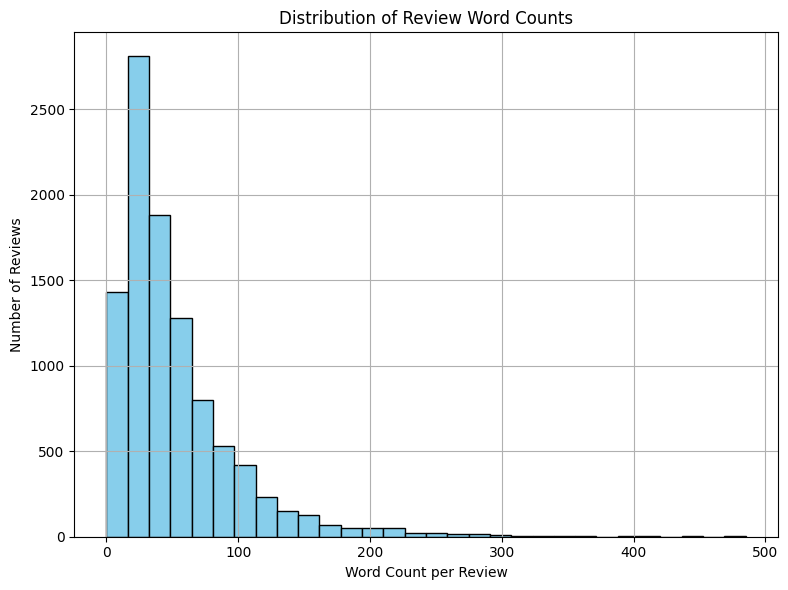

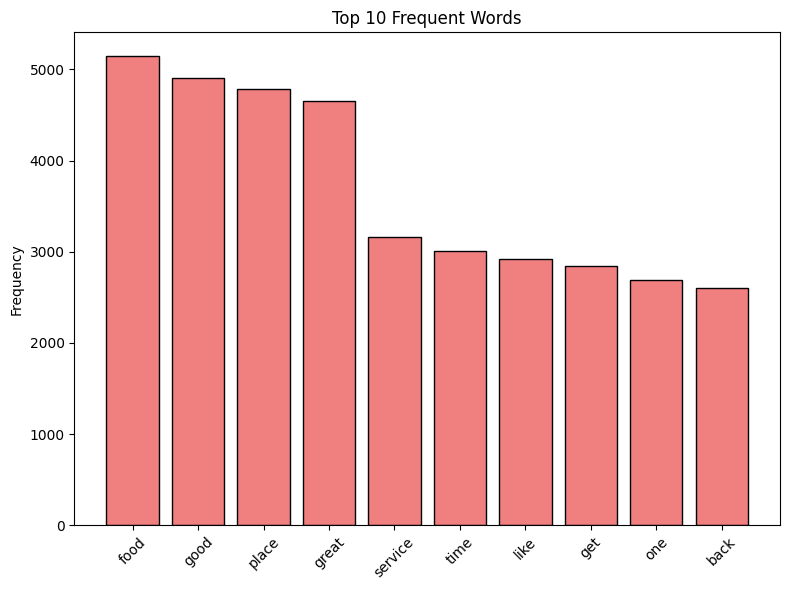

In [6]:

# Generate Preprocessing Report
preprocessing_report(df)

# Optional Visualization (Word Count Distribution + Top 10 Frequent Words)
preprocessing_visualization(df)


Top Positive & Negative Words - Bar Chart

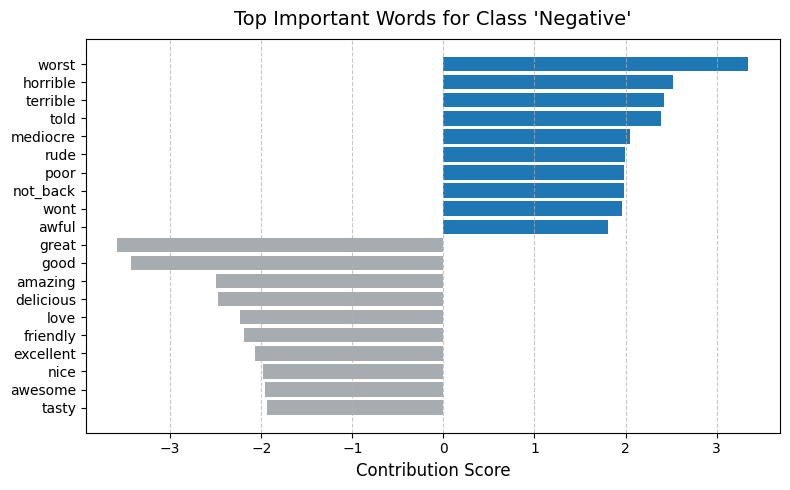

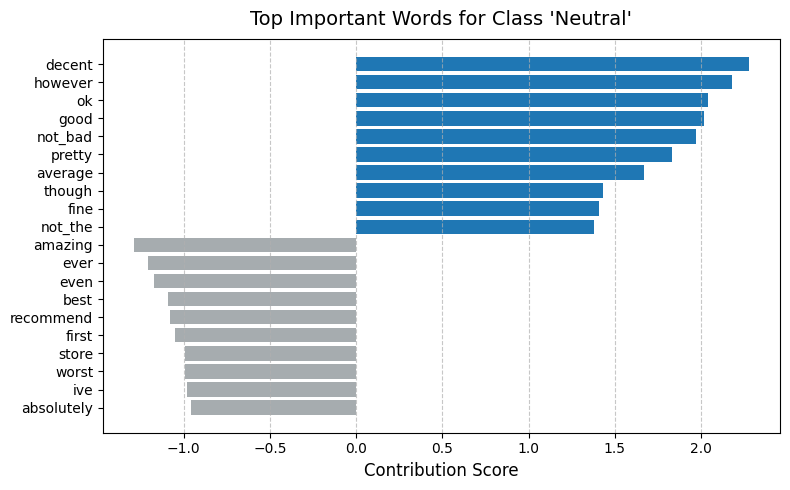

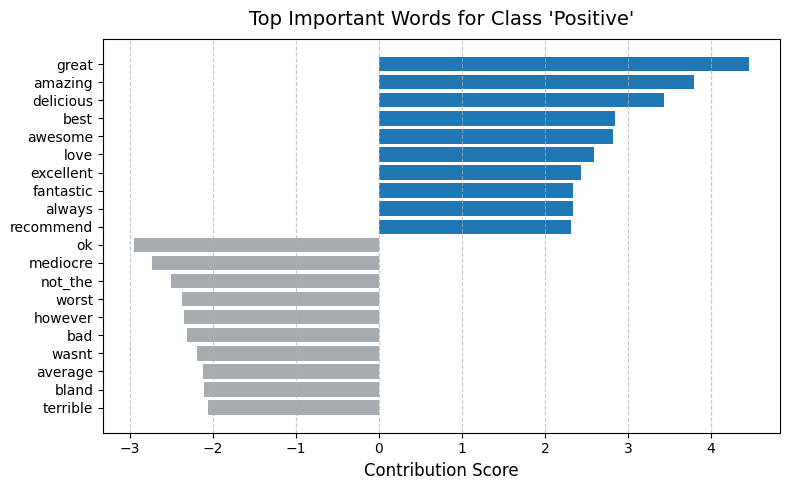

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Our model training result
contribution_dict = {
    'negative': {
        'positive': {'worst': 3.35, 'horrible': 2.52, 'terrible': 2.42, 'told': 2.39, 'mediocre': 2.05, 'rude': 1.99, 'poor': 1.98, 'not_back': 1.98, 'wont': 1.96, 'awful': 1.81},
        'negative': {'great': -3.58, 'good': -3.43, 'amazing': -2.50, 'delicious': -2.47, 'love': -2.23, 'friendly': -2.19, 'excellent': -2.07, 'nice': -1.98, 'awesome': -1.96, 'tasty': -1.94}
    },
    'neutral': {
        'positive': {'decent': 2.28, 'however': 2.18, 'ok': 2.04, 'good': 2.02, 'not_bad': 1.97, 'pretty': 1.83, 'average': 1.67, 'though': 1.43, 'fine': 1.41, 'not_the': 1.38},
        'negative': {'amazing': -1.29, 'ever': -1.21, 'even': -1.17, 'best': -1.09, 'recommend': -1.08, 'first': -1.05, 'store': -0.99, 'worst': -0.99, 'ive': -0.98, 'absolutely': -0.96}
    },
    'positive': {
        'positive': {'great': 4.46, 'amazing': 3.79, 'delicious': 3.43, 'best': 2.85, 'awesome': 2.82, 'love': 2.59, 'excellent': 2.44, 'fantastic': 2.34, 'always': 2.34, 'recommend': 2.31},
        'negative': {'ok': -2.95, 'mediocre': -2.73, 'not_the': -2.50, 'worst': -2.37, 'however': -2.35, 'bad': -2.31, 'wasnt': -2.19, 'average': -2.12, 'bland': -2.10, 'terrible': -2.06}
    }
}

# Define a unified color palette
POS_COLOR = '#1f77b4'  # muted blue
NEG_COLOR = '#A6ACAF'   

# Plotting function
def plot_contribution(class_name, contributions):
    fig, ax = plt.subplots(figsize=(8, 5))
    
    pos_words = list(contributions['positive'].keys())
    pos_values = list(contributions['positive'].values())
    
    neg_words = list(contributions['negative'].keys())
    neg_values = list(contributions['negative'].values())
    
    # Combine
    words = pos_words + neg_words
    values = pos_values + neg_values
    colors = [POS_COLOR]*len(pos_words) + [NEG_COLOR]*len(neg_words)
    
    y_pos = np.arange(len(words))
    
    ax.barh(y_pos, values, color=colors)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(words, fontsize=10)
    ax.invert_yaxis()  # Highest on top
    ax.set_xlabel('Contribution Score', fontsize=12)
    ax.set_title(f"Top Important Words for Class '{class_name.capitalize()}'", fontsize=14, pad=10)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.savefig(f"Top_Important_Words_for_Class_{class_name.capitalize()}.png", dpi=300)
    plt.show()

# Generate plots
for class_label, contribs in contribution_dict.items():
    plot_contribution(class_label, contribs)

Confusion Matrix - Heatmap

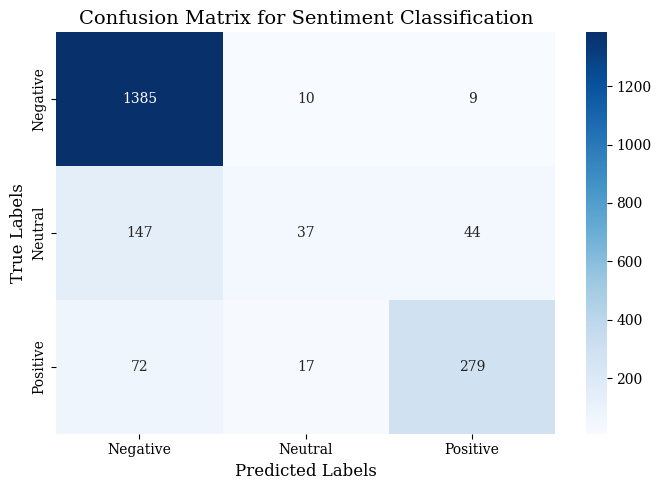

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Updated confusion matrix
confusion = np.array([
    [1385, 10, 9],
    [147, 37, 44],
    [72, 17, 279]
])

labels = ["Negative", "Neutral", "Positive"]

plt.figure(figsize=(7, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix for Sentiment Classification', fontsize=14)
plt.tight_layout()
#plt.savefig('Confusion_Matrix_for_Sentiment_Classification.png', dpi=300)
plt.show()


Class Distribution Pie Chart

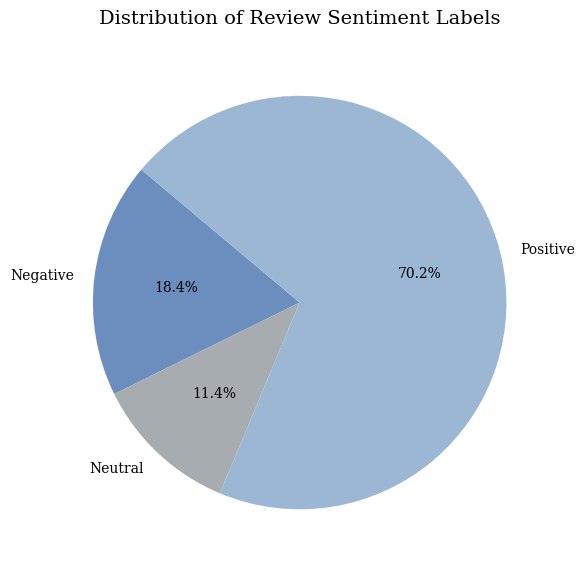

In [ ]:
import matplotlib.pyplot as plt

# Support values from classification report
supports = [368, 228, 1404]
labels = ["Negative", "Neutral", "Positive"]

# Improved Academic Blue-Grey colors (with slight variation)
colors = ['#6C8EBF', '#A6ACAF', '#9BB7D4']

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    supports, 
    labels=labels, 
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 10}
)

plt.title('Distribution of Review Sentiment Labels', fontsize=14, pad=15)
plt.tight_layout()
#plt.savefig('Distribution_of_Review_Sentiment_Labels.png', dpi=300)
plt.show()


Precision - Recall Curve

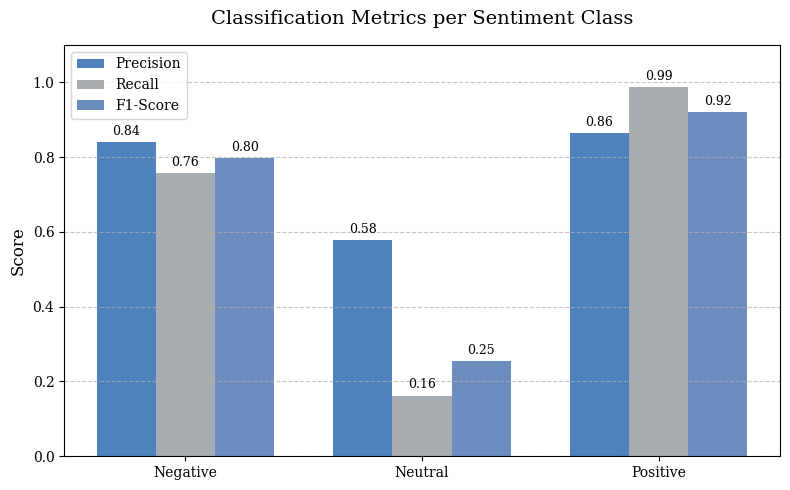

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set academic serif font
plt.rcParams.update({'font.family': 'serif'})

# Colors for Academic Blue-Grey Scheme
MAIN_COLOR = '#4F81BD'  # Blue Grey
SECONDARY_COLOR = '#A6ACAF'  # Light Grey
THIRD_COLOR = '#6C8EBF'  # Slight Blue for F1

# --- Precision-Recall-F1 Bar Chart ---
precision = [0.8404, 0.5781, 0.8635]
recall = [0.7582, 0.1623, 0.9865]
f1 = [0.7971, 0.2534, 0.9209]
classes = ['Negative', 'Neutral', 'Positive']

x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width, precision, width, label='Precision', color=MAIN_COLOR)
bars2 = ax.bar(x, recall, width, label='Recall', color=SECONDARY_COLOR)
bars3 = ax.bar(x + width, f1, width, label='F1-Score', color=THIRD_COLOR)

ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0,1.1)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_title('Classification Metrics per Sentiment Class', fontsize=14, pad=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.savefig('Classification_Metrics_BarChart.png', dpi=300)
# plt.savefig('Classification_Metrics_BarChart.pdf')
plt.show()
